In [1]:
# Analyzing data from https://www.kaggle.com/danielgrijalvas/movies accessed 2022_01_14
# Research question: Which genre and country pair results in the highest yield, 
# a) for high budget movies? b) for low budget movies?
# Created by Christine Kuhn

# Approach: 
# 1. Import, crop, and clean data
#    1A. Check for any very old movies (a then-high budget would be misinterpretted as low), clean up null budget entries,
#        and then split out the 750 highest-budget movies and 750-lowest budget movies with budgets of at least $1million.
#    1B. Within the high-budget and low-budget databases, drop data for which the country or genre subsets are small.
#    1C. Clean up remaining null entries.
# 2. Visualize high-budget data gross vs. budget and ROI for each genre and each country.
# 3. Visualize low-budget data gross vs. budget and ROI for each genre and each country.

# Analysis Summary:
# High-budget movie ROIs:
# UK Adventure movies seem to be the best bet in terms of ROI for high-budget movies: they have the highest median and
# highest maximum when excluding outliers. In fact, each element of the box plot is the highest for UK Adventure movies, 
# relative to the other country-genre pairs. The number of samples in UK Adventure is small (only 19), but they seem 
# to be consistently successful relative to the other groups. The median ROI for UK Adventure movies is 3.2, with the 
# middle 50% of ROIs being between 1.5 and 4.8. The maximum ROI for UK Adventure movies is 9.8.
# Low-budget movie ROIs:
# For low-budget movies, the highest ROI tends to be seen in US horror films. For each of the other country-genre pairs, 
# greater than 25% of the movies had a negative ROI (i.e. lost money). For US horror films, 75% had an ROI of at least 
# 1 (i.e. profit was at least as much as investment). The US horror films had the highest median and highest maximum 
# relative to each of the other low-budget categories. 25% of the low-budget US horror films had an ROI of between 3.5 
# and 17 (i.e. 350% and 1700%), and another 25% had an ROI between 17 and 37.5! 
# Correlation with year was examined:
# Almost all low-budget US Horror films had ROIs below 20 until 2010. ROI distribution for low-budget US Horror films is 
# overall higher for the 2010-2020 range than for 1980-2010. Since 2010, only 3 data points in the low-budget US Horror 
# category had negative ROIs. For low-budget Comedies and Dramas, the range of ROIs is also greater for 2010-2020 than 
# for 1980-2010. However, there remain many data points with negative ROIs for Comedy and Drama in 2010-2020.
# Correlation with other factors was considered:
# Within the low-budget US Horror data, there are 78 titles with 70 different directors, 69 writers, 70 leading stars, and
# 60 different production companies. The "star" column only lists one actor/actress. For future work, the "star" column 
# could be expanded to include the 5 top-billed stars for each movie, to more thoroughly check for correlations between 
# ROI and star.

# Conclusions: 
# For high-budget movies, UK Adventure movies can be expected to have the greatest ROI. For low-budget movies, US Horror 
# movies can be expected to have the greatest ROI. The ROI of low-budget US Horror movies is typically much greater than 
# the ROI of high-budget UK Adventure movies. 

# Future Work: 
# 1. Expand the dataset: This dataset contains information on only 7,668 of the more than 8 million movies listed on IMDb. 
# From the description on how the data was collected, as well as the analysis done here, it is not clear that there are 
# any biases in which movies made it into the subset. However, the sample is very small relative to the total number of 
# movies.  A larger sample size may show different trends.
# 2. Expand "star" data: get the 5 top-billed actors/actresses for each movie and re-examine correlations to ROIs.
# 3. Analyze franchises separate from series separate from individual movies (no sequels or 1st movie of a series).


# -------------------- 1. Import, crop, and clean data ------------------------------

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  # sets figsize to 12inch x 8inch

# Import Data
df= pd.read_csv(r'C:\Users\dwask\OneDrive\Desktop\Data Analyst Portfolio\Python Movie Analysis\movies.csv')

# database columns: 
# name = movie title
# rating = MPA rating (G, PG, PG-13, R, etc)
# genre
# year = year of release
# released = date and country of release
# score = IMDb score
# votes = count of IMDb user votes
# director
# writer
# star = the headline actor or actress of the movie
# country = main country of production
# budget
# gross = total revenue
# company = production company
# runtime

# Examine the data
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [2]:
# How many unique entries per column?
print(df.nunique())

name        7512
rating        12
genre         19
year          41
released    3414
score         72
votes        936
director    2949
writer      4535
star        2814
country       59
budget       413
gross       7472
company     2385
runtime      138
dtype: int64


In [3]:
df.sort_values(by=['name'])

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6569,'71,R,Action,2014,"October 10, 2014 (United Kingdom)",7.2,53000.0,Yann Demange,Gregory Burke,Jack O'Connell,United Kingdom,NaN,3062178.0,Film 4,99.0
1006,'Round Midnight,R,Drama,1986,"October 3, 1986 (United States)",7.4,4700.0,Bertrand Tavernier,David Rayfiel,Dexter Gordon,United States,NaN,3272593.0,Little Bear,133.0
1013,"'night, Mother",PG-13,Drama,1986,"January 29, 1987 (Australia)",7.6,2100.0,Tom Moore,Marsha Norman,Sissy Spacek,United States,NaN,441863.0,Aaron Spelling Productions,96.0
1099,*batteries not included,PG,Comedy,1987,"December 18, 1987 (United States)",6.7,32000.0,Matthew Robbins,Mick Garris,Hume Cronyn,United States,25000000.0,65088797.0,Universal Pictures,106.0
6906,10 Cloverfield Lane,PG-13,Action,2016,"March 11, 2016 (United States)",7.2,300000.0,Dan Trachtenberg,Josh Campbell,John Goodman,United States,15000000.0,110216998.0,Paramount Pictures,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3503,eXistenZ,R,Horror,1999,"April 23, 1999 (United States)",6.8,96000.0,David Cronenberg,David Cronenberg,Jude Law,United Kingdom,15000000.0,2856712.0,Dimension Films,97.0
4083,xXx,PG-13,Action,2002,"August 9, 2002 (United States)",5.9,175000.0,Rob Cohen,Rich Wilkes,Vin Diesel,United States,70000000.0,277448382.0,Revolution Studios,124.0
7112,xXx: Return of Xander Cage,PG-13,Action,2017,"January 20, 2017 (United States)",5.2,88000.0,D.J. Caruso,Rich Wilkes,Vin Diesel,China,85000000.0,346118277.0,Paramount Pictures,107.0
4761,xXx: State of the Union,PG-13,Action,2005,"April 29, 2005 (United States)",4.5,68000.0,Lee Tamahori,Rich Wilkes,Ice Cube,United States,113000000.0,71022693.0,Columbia Pictures,101.0


In [5]:
duplicate = df[df.duplicated('name',keep='first')]
dup2 = df[df.duplicated('name',keep='last')]
duplicate = duplicate.append(dup2)
dupsorted = duplicate.sort_values(by=['name'])
dupsorted

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
483,A Nightmare on Elm Street,R,Horror,1984,"November 16, 1984 (United States)",7.5,212000.0,Wes Craven,Wes Craven,Heather Langenkamp,United States,1800000.0,2.550714e+07,New Line Cinema,91.0
5712,A Nightmare on Elm Street,R,Crime,2010,"April 30, 2010 (United States)",5.2,95000.0,Samuel Bayer,Wesley Strick,Jackie Earle Haley,United States,35000000.0,1.156952e+08,New Line Cinema,95.0
7556,After the Wedding,PG-13,Drama,2019,"November 1, 2019 (United Kingdom)",6.3,6700.0,Bart Freundlich,Bart Freundlich,Julianne Moore,United States,NaN,2.790019e+06,Sony Pictures Classics,112.0
4995,After the Wedding,R,Drama,2006,"May 11, 2007 (United States)",7.7,33000.0,Susanne Bier,Susanne Bier,Mads Mikkelsen,Denmark,NaN,1.163272e+07,Zentropa Entertainments,120.0
7481,Aladdin,PG,Adventure,2019,"May 24, 2019 (United States)",6.9,239000.0,Guy Ritchie,John August,Will Smith,United Kingdom,183000000.0,1.050694e+09,Walt Disney Pictures,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4799,Venom,R,Horror,2005,"September 16, 2005 (United States)",4.6,9700.0,Jim Gillespie,Flint Dille,Agnes Bruckner,United States,NaN,8.817790e+05,Dimension Films,87.0
1812,Where the Heart Is,R,Comedy,1990,"February 23, 1990 (United States)",6.0,1500.0,John Boorman,Telsche Boorman,Dabney Coleman,United States,15000000.0,1.106475e+06,Touchstone Pictures,107.0
3708,Where the Heart Is,PG-13,Comedy,2000,"April 28, 2000 (United States)",6.7,32000.0,Matt Williams,Lowell Ganz,Natalie Portman,United States,15000000.0,4.086372e+07,Twentieth Century Fox,120.0
6035,Wuthering Heights,Not Rated,Drama,2011,"November 11, 2011 (United Kingdom)",6.0,9700.0,Andrea Arnold,Andrea Arnold,Kaya Scodelario,United Kingdom,NaN,1.742215e+06,Film4,129.0


In [7]:
duplicateyr = df[df.duplicated(['name','year'],keep='first')]
dup2yr = df[df.duplicated(['name','year'],keep='last')]
duplicateyr = duplicateyr.append(dup2yr)
dupsortedyr = duplicateyr.sort_values(by=['name'])
dupsortedyr

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [8]:
# Some titles appear more than once, but they were released in different years. So, no true duplicate rows in the data.

# Look at year range
print(np.min(df.year), np.max(df.year))

1980 2020


In [9]:
# All movies are fairly recent, so keep all. 

# Split out "high budget" data and "low budget" data. Keep 10% with highest budgets and 10% with lowest budgets (lowest but with budget of at least 1million)
df_high = df.nlargest(750, 'budget').copy()
df_high = df_high.reset_index(drop=True)

# Drop entries with budget=NaN
df_nobudgetnans = df
df_nobudgetnans.dropna(subset = ["budget"], inplace=True)
# Also drop entries with budget < 1million
df_nobudgetnans = df_nobudgetnans[df_nobudgetnans['budget'] >= 1000000]

df_low = df_nobudgetnans.nsmallest(750, 'budget').copy()
df_low = df_low.reset_index(drop=True)

df_high

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
1,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
2,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000.0,1.332699e+09,Walt Disney Pictures,152.0
3,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000.0,9.609965e+08,Walt Disney Pictures,169.0
4,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,Double Jeopardy,R,Crime,1999,"September 24, 1999 (United States)",6.5,78000.0,Bruce Beresford,David Weisberg,Ashley Judd,United States,70000000.0,1.778416e+08,Paramount Pictures,105.0
746,Runaway Bride,PG,Comedy,1999,"July 30, 1999 (United States)",5.6,95000.0,Garry Marshall,Josann McGibbon,Julia Roberts,United States,70000000.0,3.094603e+08,Paramount Pictures,116.0
747,Dudley Do-Right,PG,Comedy,1999,"August 27, 1999 (United States)",3.9,10000.0,Hugh Wilson,Jay Ward,Brendan Fraser,United States,70000000.0,9.974410e+06,Universal Pictures,77.0
748,What Women Want,PG-13,Comedy,2000,"December 15, 2000 (United States)",6.4,197000.0,Nancy Meyers,Josh Goldsmith,Mel Gibson,United States,70000000.0,3.741117e+08,Paramount Pictures,127.0


In [10]:
df_low

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Fog,R,Horror,1980,"February 8, 1980 (United States)",6.8,66000.0,John Carpenter,John Carpenter,Adrienne Barbeau,United States,1000000.0,21448782.0,AVCO Embassy Pictures,89.0
1,The Howling,R,Horror,1981,"April 10, 1981 (United States)",6.6,32000.0,Joe Dante,Gary Brandner,Dee Wallace,United States,1000000.0,17985893.0,Embassy Pictures,91.0
2,Nausicaä of the Valley of the Wind,NaN,Animation,1984,"November 25, 1987 (United States)",8.1,157000.0,Hayao Miyazaki,Hayao Miyazaki,Sumi Shimamoto,Japan,1000000.0,8736506.0,Nibariki,117.0
3,Almost You,R,Comedy,1984,"March 29, 1985 (United States)",5.1,216.0,Adam Brooks,Adam Brooks,Brooke Adams,United States,1000000.0,95000.0,Almost You,96.0
4,The Breakfast Club,R,Comedy,1985,"February 15, 1985 (United States)",7.8,367000.0,John Hughes,John Hughes,Emilio Estevez,United States,1000000.0,51525171.0,Universal Pictures,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,Mike's Murder,R,Drama,1984,"March 9, 1984 (United States)",5.8,822.0,James Bridges,James Bridges,Debra Winger,United States,6300000.0,1059966.0,Skyewiay,109.0
746,The Terminator,R,Action,1984,"October 26, 1984 (United States)",8.0,812000.0,James Cameron,James Cameron,Arnold Schwarzenegger,United Kingdom,6400000.0,78371200.0,Cinema '84,107.0
747,Hannah and Her Sisters,PG-13,Comedy,1986,"March 14, 1986 (United States)",7.9,68000.0,Woody Allen,Woody Allen,Mia Farrow,United States,6400000.0,40084041.0,Orion Pictures,107.0
748,Never Talk to Strangers,R,Crime,1995,"October 20, 1995 (United States)",5.2,6400.0,Peter Hall,Lewis A. Green,Rebecca De Mornay,United States,6400000.0,6858261.0,TriStar Pictures,86.0


In [11]:
# Now how many unique entries per column?
print(df_high.nunique())

name        745
rating        5
genre        12
year         33
released    640
score        56
votes       428
director    368
writer      506
star        318
country      15
budget      104
gross       750
company     140
runtime     104
dtype: int64


In [12]:
# High budget films: 12 genres, 15 countries. 
print(df_high['country'].value_counts())

United States     647
United Kingdom     53
China              11
France              9
Germany             7
New Zealand         6
Canada              6
Australia           4
Japan               1
Denmark             1
Hong Kong           1
Spain               1
South Africa        1
Czech Republic      1
Finland             1
Name: country, dtype: int64


In [13]:
# Very small sample for all but US and UK, so keep only US and UK

df_high.drop(df_high[~df_high['country'].str.contains('United')].index, inplace = True)
print(df_high['country'].value_counts())

#df_high.drop(df_high[df_high['country'] == 'New Zealand'].index, inplace = True)
#df_high.drop(df_high[df_high['country'] == 'China'].index, inplace = True)
#df_high.drop(df_high[df_high['country'] == 'France'].index, inplace = True)
#print(df_high['country'].value_counts())

United States     647
United Kingdom     53
Name: country, dtype: int64


In [14]:
print(df_high['genre'].value_counts())

Action       375
Animation    130
Comedy        61
Adventure     59
Drama         38
Crime         15
Biography     13
Horror         3
Mystery        2
Fantasy        2
Family         1
Sci-Fi         1
Name: genre, dtype: int64


In [15]:
# Very small sample for Crime, Biography, Horror, Mystery, Fantasy, Family, Sci-Fi, so drop those
df_high=df_high[df_high["genre"].str.contains("Crime|Biography|Horror|Mystery|Fantasy|Family|Sci-Fi")==False].copy()
print(df_high['genre'].value_counts())

Action       375
Animation    130
Comedy        61
Adventure     59
Drama         38
Name: genre, dtype: int64


In [16]:
print(df_low.nunique())

name        750
rating        8
genre        11
year         41
released    658
score        52
votes       270
director    617
writer      658
star        618
country      34
budget       60
gross       725
company     509
runtime      66
dtype: int64


In [17]:
# Low budget films: 11 genres, 34 countries. 

print(df_low['country'].value_counts())

United States            560
United Kingdom            63
Canada                    22
France                    10
Australia                 10
Italy                      8
Japan                      8
Mexico                     7
South Korea                7
Spain                      6
Ireland                    5
New Zealand                5
Denmark                    4
Russia                     3
Argentina                  3
Sweden                     3
Germany                    3
Hong Kong                  2
Brazil                     2
India                      2
Indonesia                  2
Switzerland                2
Iceland                    1
Norway                     1
Republic of Macedonia      1
Yugoslavia                 1
Jamaica                    1
Colombia                   1
Netherlands                1
Israel                     1
China                      1
Taiwan                     1
Lebanon                    1
South Africa               1
Name: country,

In [18]:
# Very small sample for all but US and UK, so keep only US and UK
df_low=df_low[df_low["country"].str.contains("United")==True].copy()
print(df_low['country'].value_counts())

United States     560
United Kingdom     63
Name: country, dtype: int64


In [19]:
print(df_low['genre'].value_counts())

Comedy       209
Drama        125
Horror        84
Action        79
Crime         54
Biography     24
Adventure     23
Fantasy       12
Animation      8
Thriller       3
Sci-Fi         2
Name: genre, dtype: int64


In [20]:
# Very small sample for all but Comedy, Horror, Drama, Action, Crime, so keep only those
df_low=df_low[df_low["genre"].str.contains("Drama|Comedy|Horror|Action|Crime")==True].copy()
print(df_low['genre'].value_counts())

Comedy    209
Drama     125
Horror     84
Action     79
Crime      54
Name: genre, dtype: int64


In [21]:
# Reset indices
df_high = df_high.reset_index(drop=True)
df_low = df_low.reset_index(drop=True)

# Check for null entries
for col in df_high.columns:
    missing = np.any(df_high[col].isnull())
    print('{} - {}'.format(col, missing))

name - False
rating - False
genre - False
year - False
released - False
score - False
votes - False
director - False
writer - False
star - False
country - False
budget - False
gross - False
company - False
runtime - False


In [22]:
# No missing entries in df_high!

# Check for null entries in df_low
for col in df_low.columns:
    missing = np.any(df_low[col].isnull())
    print('{} - {}'.format(col, missing))

name - False
rating - True
genre - False
year - False
released - False
score - True
votes - True
director - False
writer - False
star - False
country - False
budget - False
gross - True
company - False
runtime - False


In [23]:
# In df_low, null entries in score, votes, and gross

# Replace the null entries with 0
df_low["votes"].fillna(0, inplace=True)
df_low["score"].fillna(0, inplace=True)
df_low["gross"].fillna(0, inplace=True)

# Check again for missing entries
for col in df_low.columns:
    missing = np.any(df_low[col].isnull())
    print('{} - {}'.format(col, missing))

name - False
rating - True
genre - False
year - False
released - False
score - False
votes - False
director - False
writer - False
star - False
country - False
budget - False
gross - False
company - False
runtime - False


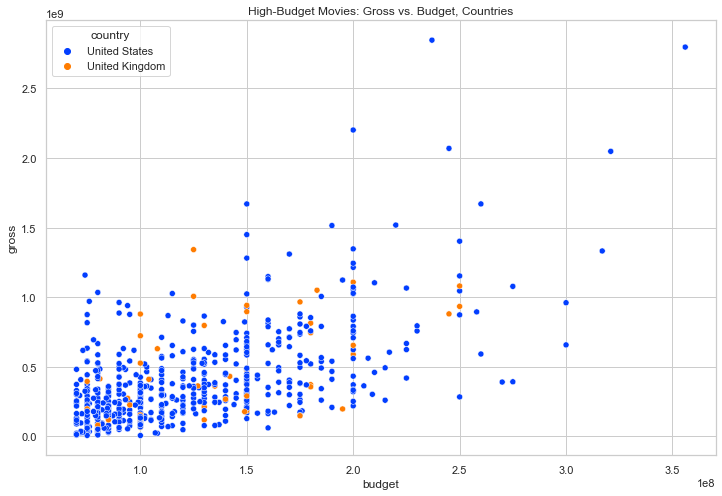

In [24]:
# No missing entries in df_low, except rating, which won't be used

# Data is now clean and ready to analyze

# -------------------- 2. Visualize high-budget data -------------------------
# Looking for trends in gross vs. budget for each genre and each country
sns.set_theme(style="whitegrid")
sns.set_palette('bright')
sns.scatterplot(x='budget', y='gross', data=df_high, hue='country')
plt.title("High-Budget Movies: Gross vs. Budget, Countries")
plt.show()

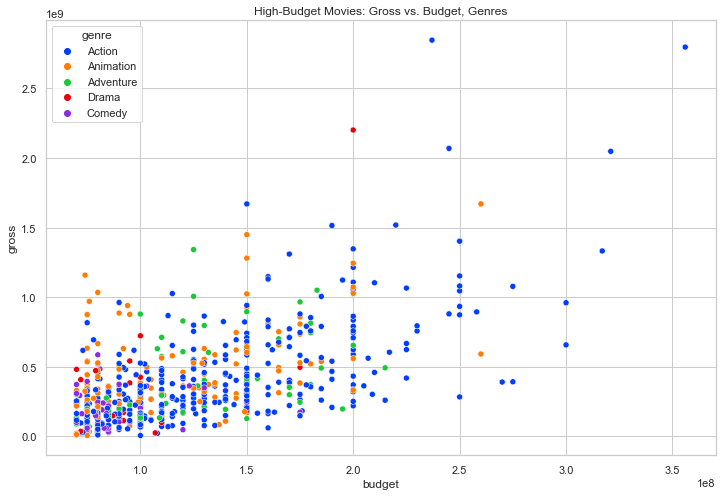

In [25]:
sns.scatterplot(x='budget', y='gross', data=df_high, hue='genre')
plt.title("High-Budget Movies: Gross vs. Budget, Genres")
plt.show()

In [26]:
df_high["ROI"] = (df_high["gross"]-df_high["budget"])/df_high["budget"]

c_codes, c_uni = pd.factorize(df_high['country'])
g_codes, g_uni = pd.factorize(df_high['genre'])
df_high["c_codes"] = c_codes
df_high["g_codes"] = g_codes

In [27]:
print(c_uni)

Index(['United States', 'United Kingdom'], dtype='object')


In [28]:
print(g_uni)

Index(['Action', 'Animation', 'Adventure', 'Drama', 'Comedy'], dtype='object')


In [29]:
meanROIs = np.zeros((5,2))
print(meanROIs)
stdROIs = np.zeros((5,2))
maxROIs = np.zeros((5,2))
minROIs = np.zeros((5,2))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [30]:
for i in range(np.max(c_codes)+1):
    for j in range(np.max(g_codes)+1):
        df_gc = df_high[(df_high.c_codes==i) & (df_high.g_codes==j)]
        count_ij = len(df_gc.c_codes)
        if count_ij>10:
            meanROI_ij = np.mean(df_gc.ROI)
            meanROIs[j,i]=meanROI_ij
            stdROI_ij = np.std(df_gc.ROI)
            stdROIs[j,i]=stdROI_ij
            maxROI_ij = np.max(df_gc.ROI)
            maxROIs[j,i]=maxROI_ij
            minROI_ij = np.min(df_gc.ROI)
            minROIs[j,i]=minROI_ij
        else:
            meanROIs[j,i]=0
            stdROIs[j,i]=0
            maxROIs[j,i]=0
            minROIs[j,i]=0
        
print(meanROIs)
# Cols: US, UK
# Rows: Action, Animation, Adventure, Drama, Comedy

[[1.96101093 1.93268827]
 [2.94893838 0.        ]
 [1.76353306 3.51130057]
 [1.48301058 0.        ]
 [1.20915124 0.        ]]


In [31]:
print(stdROIs)

[[1.92404154 1.52881071]
 [2.65778686 0.        ]
 [1.51614239 2.6193609 ]
 [2.30482503 0.        ]
 [1.5579025  0.        ]]


In [32]:
print(maxROIs)

[[11.01369706  5.28114931]
 [14.66817111  0.        ]
 [ 5.91456378  9.73857332]
 [10.00823632  0.        ]
 [ 6.33455381  0.        ]]


In [33]:
print(minROIs)

[[-0.92896027 -0.15042819]
 [-0.89836847  0.        ]
 [-0.14407787  0.01378258]
 [-0.75869195  0.        ]
 [-0.85750843  0.        ]]


Text(0.5, 1.0, 'High-Budget Movie ROIs')

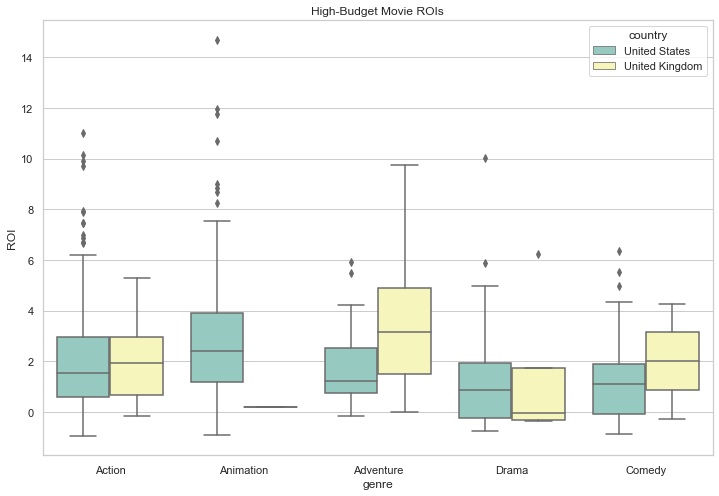

In [34]:
# Boxplot of high-budget movie ROIs
ax = sns.boxplot(x="genre", y="ROI", hue="country",
                 data=df_high, palette="Set3")
ax.set_title("High-Budget Movie ROIs")

In [35]:
nobs =  df_high.groupby(['genre','country']).apply(lambda x: 'n: {}'.format(len(x)))
print(nobs)

genre      country       
Action     United Kingdom     n: 25
           United States     n: 350
Adventure  United Kingdom     n: 19
           United States      n: 40
Animation  United Kingdom      n: 1
           United States     n: 129
Comedy     United Kingdom      n: 2
           United States      n: 59
Drama      United Kingdom      n: 4
           United States      n: 34
dtype: object


In [36]:
# Drop UK Animation, UK Comedy, and UK Drama because sample size is very small
df_high2=df_high
df_high2=df_high2.drop(df_high2[(df_high2.country.str.contains("Kingdom")==True) & (df_high2.genre.str.contains("Animation|Comedy|Drama")==True)].index)

nobs =  df_high2.groupby(['genre','country']).apply(lambda x: 'n: {}'.format(len(x)))
print(nobs)

genre      country       
Action     United Kingdom     n: 25
           United States     n: 350
Adventure  United Kingdom     n: 19
           United States      n: 40
Animation  United States     n: 129
Comedy     United States      n: 59
Drama      United States      n: 34
dtype: object


Text(0.5, 1.0, 'High-Budget Movie ROIs')

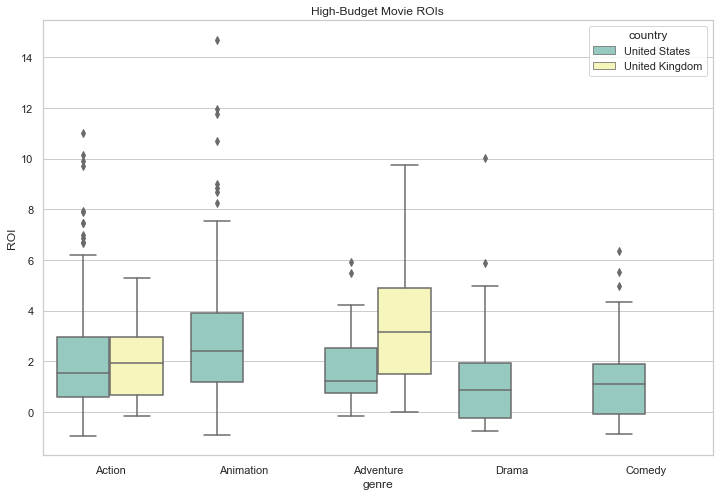

In [37]:
# Boxplot of high-budget movie ROIs, large samples only
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="genre", y="ROI", hue="country",
                 data=df_high2, palette="Set3")
ax.set_title("High-Budget Movie ROIs")

In [38]:
# High budget movie ROIs:
# UK Adventure movies seem to be the best bet in terms of ROI: highest median, highest maximum when excluding outliers. 
# In fact, each element of the box plot is the highest for UK Adventure movies, relative to the other country-genre pairs.
# The number of samples in UK Adventure is small (only 19), but they seem to be consistently successful relative to the 
# other groups. The median ROI for UK Adventure movies is 3.2, with the middle 50% of ROIs being between 1.5 and 4.8.  
# The maximum ROI for UK Adventure movies is 9.8.

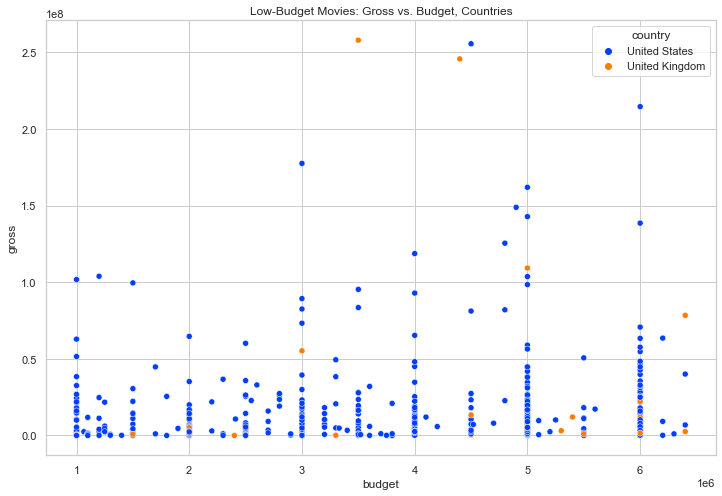

In [39]:
# -------------------- 3. Visualize low-budget data --------------------------
# Looking for trends in gross vs. budget for each genre and each country

sns.set_palette('bright')
sns.scatterplot(x='budget', y='gross', data=df_low, hue='country')
plt.title("Low-Budget Movies: Gross vs. Budget, Countries")
plt.show()

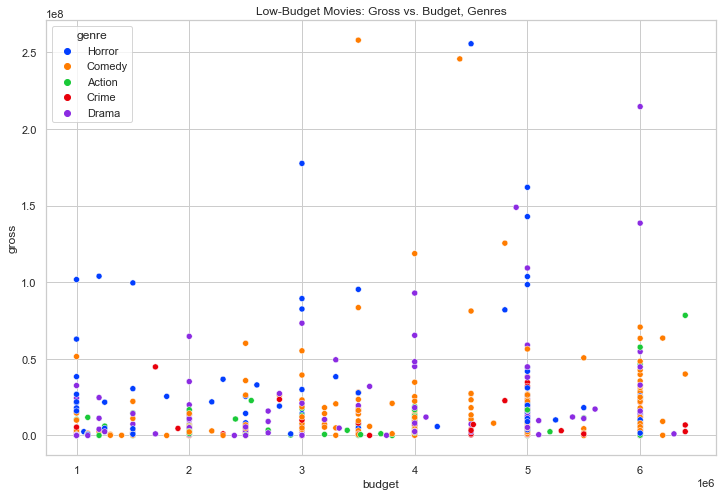

In [40]:
sns.scatterplot(x='budget', y='gross', data=df_low, hue='genre')
plt.title("Low-Budget Movies: Gross vs. Budget, Genres")
plt.show()

In [41]:
df_low["ROI"] = (df_low["gross"]-df_low["budget"])/df_low["budget"]

c_codes_low, c_uni_low = pd.factorize(df_low['country'])
g_codes_low, g_uni_low = pd.factorize(df_low['genre'])
df_low["c_codes_low"] = c_codes_low
df_low["g_codes_low"] = g_codes_low

In [42]:
print(c_uni_low)

Index(['United States', 'United Kingdom'], dtype='object')


In [43]:
print(g_uni_low)

Index(['Horror', 'Comedy', 'Action', 'Crime', 'Drama'], dtype='object')


In [44]:
meanROIs_low = np.zeros((5,2))
print(meanROIs_low)
stdROIs_low = np.zeros((5,2))
maxROIs_low = np.zeros((5,2))
minROIs_low = np.zeros((5,2))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [45]:
for i in range(np.max(c_codes_low)+1):
    for j in range(np.max(g_codes_low)+1):
        df_gc_low = df_low[(df_low.c_codes_low==i) & (df_low.g_codes_low==j)]
        count_ij_low = len(df_gc_low.c_codes_low)
        if count_ij_low>10:
            meanROI_ij = np.mean(df_gc_low.ROI)
            meanROIs_low[j,i]=meanROI_ij
            stdROI_ij = np.std(df_gc_low.ROI)
            stdROIs_low[j,i]=stdROI_ij
            maxROI_ij = np.max(df_gc_low.ROI)
            maxROIs_low[j,i]=maxROI_ij
            minROI_ij = np.min(df_gc_low.ROI)
            minROIs_low[j,i]=minROI_ij
        else:
            meanROIs_low[j,i]=0
            stdROIs_low[j,i]=0
            maxROIs_low[j,i]=0
            minROIs_low[j,i]=0
        
print(meanROIs_low)
# Cols: US, UK
# Rows: Horror, Comedy, Action, Drama, Crime

[[12.26281718  0.        ]
 [ 2.6467083  10.65159013]
 [ 1.26722802  0.        ]
 [ 1.51495529  0.        ]
 [ 4.31398841  2.19826072]]


In [46]:
print(stdROIs_low)

[[19.8353457   0.        ]
 [ 5.81954756 22.39707481]
 [ 2.84445722  0.        ]
 [ 4.22854181  0.        ]
 [ 7.83160003  5.24015324]]


In [47]:
print(maxROIs_low)

[[100.75849      0.        ]
 [ 50.525171    72.69675686]
 [  9.73283545   0.        ]
 [ 25.33128294   0.        ]
 [ 34.76287367  20.8566036 ]]


In [48]:
print(minROIs_low)

[[-1.          0.        ]
 [-1.         -0.96123545]
 [-1.          0.        ]
 [-1.          0.        ]
 [-1.         -0.99300625]]


Text(0.5, 1.0, 'Low-Budget Movie ROIs')

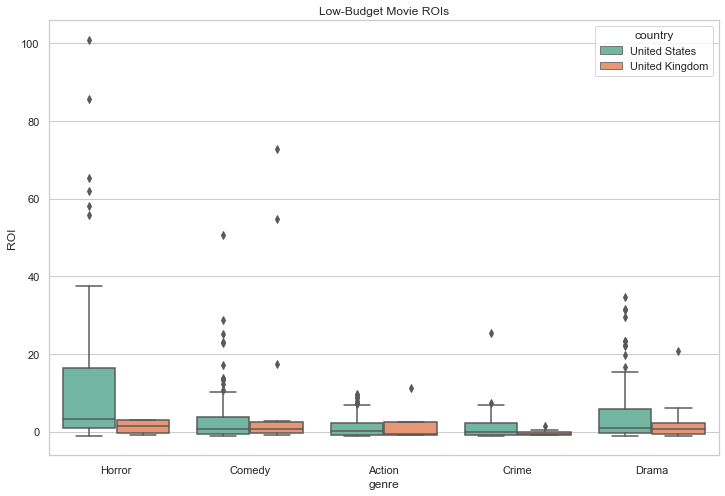

In [49]:
# Boxplot of low-budget movie ROIs
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="genre", y="ROI", hue="country",
                 data=df_low, palette="Set2")
ax.set_title("Low-Budget Movie ROIs")

In [50]:
nobs =  df_low.groupby(['genre','country']).apply(lambda x: 'n: {}'.format(len(x)))
print(nobs)

genre   country       
Action  United Kingdom      n: 4
        United States      n: 75
Comedy  United Kingdom     n: 14
        United States     n: 195
Crime   United Kingdom      n: 9
        United States      n: 45
Drama   United Kingdom     n: 16
        United States     n: 109
Horror  United Kingdom      n: 6
        United States      n: 78
dtype: object


In [51]:
# Drop UK Action, UK Crime, and UK Horror because sample size is very small
df_low2=df_low
df_low2=df_low2.drop(df_low2[(df_low2.country.str.contains("Kingdom")==True) & (df_low2.genre.str.contains("Action|Crime|Horror")==True)].index)

nobs =  df_low2.groupby(['genre','country']).apply(lambda x: 'n: {}'.format(len(x)))
print(nobs)

genre   country       
Action  United States      n: 75
Comedy  United Kingdom     n: 14
        United States     n: 195
Crime   United States      n: 45
Drama   United Kingdom     n: 16
        United States     n: 109
Horror  United States      n: 78
dtype: object


Text(0.5, 1.0, 'Low-Budget Movie ROIs')

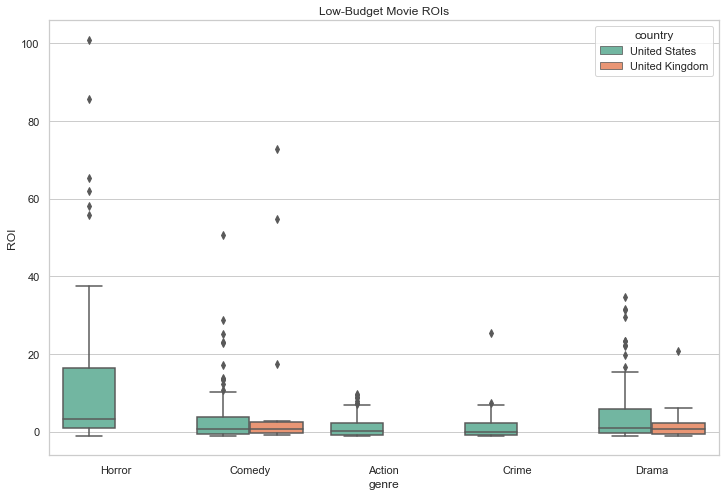

In [52]:
# Boxplot of high-budget movie ROIs, large samples only
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="genre", y="ROI", hue="country",
                 data=df_low2, palette="Set2")
ax.set_title("Low-Budget Movie ROIs")

Text(0.5, 1.0, 'Low-Budget Movie ROIs')

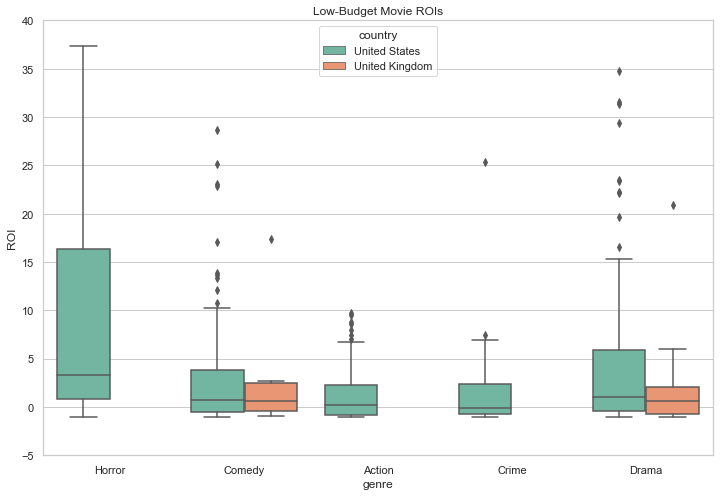

In [53]:
# Boxplot of high-budget movie ROIs, large samples only
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="genre", y="ROI", hue="country",
                 data=df_low2, palette="Set2")
ax.set(ylim=(-5,40))
ax.set_title("Low-Budget Movie ROIs")

In [54]:
# Low-budget movie ROIs:
# For low-budget movies, the highest ROI tends to be seen in US horror films.  
# For each of the other country-genre pairs, greater than 25% of the movies had a negative ROI (i.e. lost money). 
# For US horror films, 75% had an ROI of at least 1 (i.e. profit was at least as much as investment). 
# The US horror films had the highest median and highest maximum relative to each of the other low-budget categories. 
# 25% of the low-budget US horror films had an ROI of between 3.5 and 17 (i.e. 350% and 1700%), 
# and another 25% had an ROI between 17 and 37.5. 

df_low_USHorror = df_low2
df_low_USHorror=df_low_USHorror[(df_low_USHorror["country"].str.contains("States")==True) & (df_low_USHorror["genre"].str.contains("Horror")==True)].copy()
df_low_USHorror = df_low_USHorror.reset_index(drop=True)
df_low_USHorror

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,ROI,c_codes_low,g_codes_low
0,The Fog,R,Horror,1980,"February 8, 1980 (United States)",6.8,66000.0,John Carpenter,John Carpenter,Adrienne Barbeau,United States,1000000.0,21448782.0,AVCO Embassy Pictures,89.0,20.448782,0,0
1,The Howling,R,Horror,1981,"April 10, 1981 (United States)",6.6,32000.0,Joe Dante,Gary Brandner,Dee Wallace,United States,1000000.0,17985893.0,Embassy Pictures,91.0,16.985893,0,0
2,You're Next,R,Horror,2011,"August 23, 2013 (United States)",6.6,92000.0,Adam Wingard,Simon Barrett,Sharni Vinson,United States,1000000.0,26895481.0,Snoot Entertainment,95.0,25.895481,0,0
3,Chernobyl Diaries,R,Horror,2012,"May 25, 2012 (United States)",5.0,65000.0,Bradley Parker,Oren Peli,Jesse McCartney,United States,1000000.0,38390020.0,Alcon Entertainment,86.0,37.390020,0,0
4,The Devil Inside,R,Horror,2012,"January 6, 2012 (United States)",4.2,35000.0,William Brent Bell,William Brent Bell,Fernanda Andrade,United States,1000000.0,101758490.0,Insurge Pictures,83.0,100.758490,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Nightmares,R,Horror,1983,"September 9, 1983 (United States)",5.8,3000.0,Joseph Sargent,Christopher Crowe,Cristina Raines,United States,6000000.0,6670680.0,Universal Pictures,99.0,0.111780,0,0
74,Pulse,PG-13,Horror,1988,"March 4, 1988 (United States)",5.4,2300.0,Paul Golding,Paul Golding,Cliff De Young,United States,6000000.0,40397.0,Aspen Film Society,91.0,-0.993267,0,0
75,Candyman,R,Horror,1992,"October 16, 1992 (United States)",6.6,74000.0,Bernard Rose,Clive Barker,Virginia Madsen,United States,6000000.0,25795897.0,Candyman Films,99.0,3.299316,0,0
76,Candyman: Farewell to the Flesh,R,Horror,1995,"March 17, 1995 (United States)",5.3,11000.0,Bill Condon,Clive Barker,Tony Todd,United States,6000000.0,13940383.0,PolyGram Filmed Entertainment,95.0,1.323397,0,0


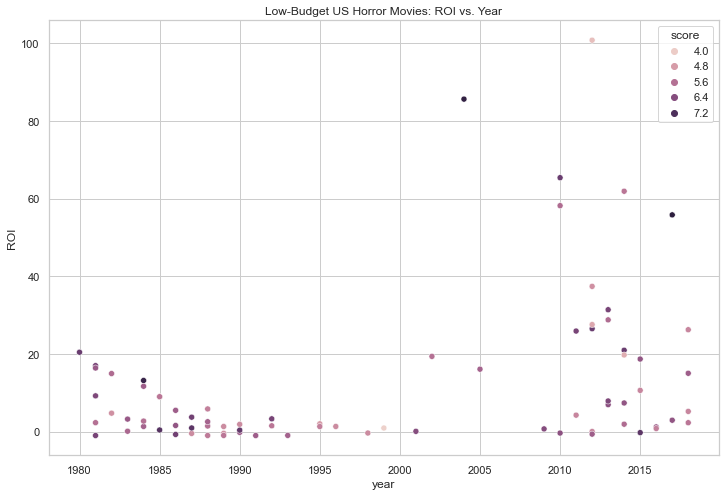

In [55]:
# The original data was over the years 1980-2020. Are ROIs still high in recent years?

sns.set_palette('bright')
sns.scatterplot(x='year', y='ROI', data=df_low_USHorror, hue='score')
plt.title("Low-Budget US Horror Movies: ROI vs. Year")
plt.show()

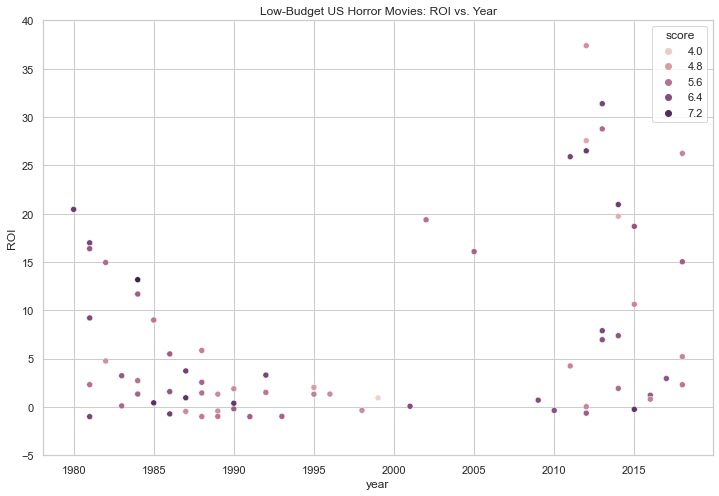

In [56]:
# ROIs are almost all below 20 until 2010.
# Data with ROI > 40 are outliers, so crop the plot at y=40
sns.set_palette('bright')
ax=sns.scatterplot(x='year', y='ROI', data=df_low_USHorror, hue='score')
ax.set(ylim=(-5,40))
plt.title("Low-Budget US Horror Movies: ROI vs. Year")
plt.show()

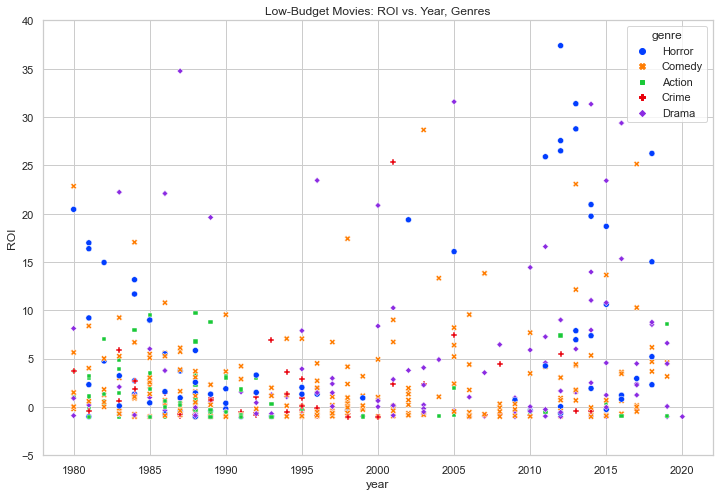

In [57]:
# ROI distribution is overall higher for the 2010-2020 range than for 1980-2010. Since 2010, only 3 data points 
# with negative ROIs. 

# Check out all of the genres over the years, cropping out the outliers.
sns.set_palette('bright')
ax=sns.scatterplot(x='year', y='ROI', data=df_low2, style='genre', hue='genre')
ax.set(ylim=(-5,40))
plt.title("Low-Budget Movies: ROI vs. Year, Genres")
plt.show()

In [58]:
# In the Comedy and Drama genres, the range of ROIs is also greater for 2010-2020 than for 1980-2010. However, there 
# remain many data points with negative ROIs for Comedy and Drama in 2010-2020.

print(df_low_USHorror.nunique())

name           78
rating          3
genre           1
year           32
released       78
score          30
votes          61
director       70
writer         69
star           70
country         1
budget         25
gross          77
company        60
runtime        26
ROI            77
c_codes_low     1
g_codes_low     1
dtype: int64


In [59]:
# 78 titles with 70 different directors, 69 writers, 70 leading stars, and 60 different companies. The "star" column 
# only lists one actor/actress. For future work, could add columns so that the 5 top-billed stars are listed for each 
# movie, and check for correlations between ROI and star.